# Introduccion

Hoy vamos a ver una introduccion a los modelos de ML. La idea no es focalizarse en los modelos en si sino en la logica y la funcion que cumplen. En esta clase vamos a pasar por alto los detalles (y un poco las buenas practicas) para focalizarnos en las ideas que queremos presentar.

In [1]:
# vamos a usar una lista reducida de especies del arbolado de la ciudad que la extrajimos en una notebook aparte

import pandas as pd

arbolado = pd.read_csv("https://cdn.buenosaires.gob.ar/datosabiertos/datasets/arbolado-publico-lineal/arbolado-publico-lineal-2017-2018.csv")
arbolado.head()

C:\Users\Ionatan\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3444: DtypeWarning: Columns (2,7,8) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


,long,lat,nro_registro,tipo_activ,comuna,manzana,calle_nombre,calle_altura,calle_chapa,direccion_normalizada,ubicacion,nombre_cientifico,ancho_acera,estado_plantera,ubicacion_plantera,nivel_plantera,diametro_altura_pecho,altura_arbol
0,-58.378563,-34.594902,26779,Lineal,1,NaN,Esmeralda,1000.0,1120.0,ESMERALDA 1120,NaN,Tipuana tipu,5.5,Ocupada,Regular,A nivel,88.0,34.0
1,-58.381532,-34.592319,30887,Lineal,1,NaN,Pellegrini Carlos,1300.0,1345.0,"PELLEGRINI, CARLOS 1345",Exacta,Peltophorum dubium,4.5,Ocupada,Regular,Elevada,6.0,5.0
2,-58.379103,-34.591939,30904,Lineal,1,NaN,Arroyo,800.0,848.0,ARROYO 848,Exacta,Fraxinus pennsylvanica,4,Ocupada,Regular,A nivel,7.0,6.0
3,-58.380710,-34.591548,31336,Lineal,1,NaN,Arroyo,900.0,932.0,ARROYO 932,LD,Fraxinus pennsylvanica,NaN,Ocupada,Regular,A nivel,9.0,29.0
4,-58.380710,-34.591548,31337,Lineal,1,NaN,Arroyo,900.0,932.0,ARROYO 932,LA,Jacaranda mimosifolia,NaN,Ocupada,Regular,A nivel,13.0,8.0


In [2]:
lista_especies = ["Photinia x fraseri", "Populus nigra","Cupressus sp."]


In [3]:
# vamos a usar solo algunas caracteristicas

data = arbolado[arbolado["nombre_cientifico"].isin(lista_especies)]
data = data[["long","lat","nombre_cientifico","diametro_altura_pecho","altura_arbol"]]

In [4]:
import seaborn as sns

<AxesSubplot:xlabel='diametro_altura_pecho', ylabel='altura_arbol'>

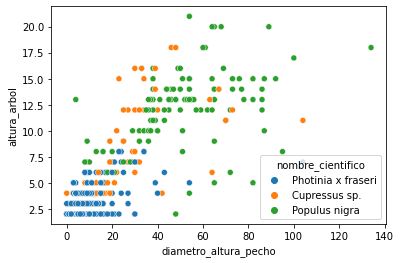

In [7]:
sns.scatterplot(data = data, x="diametro_altura_pecho", y="altura_arbol", hue="nombre_cientifico")


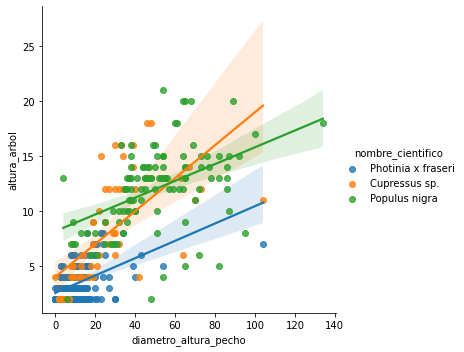

In [6]:
# veamos si podemos identificar las tendencias

sns.lmplot(data = data, x="diametro_altura_pecho", y="altura_arbol", hue="nombre_cientifico")

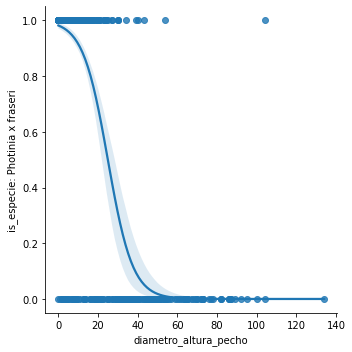

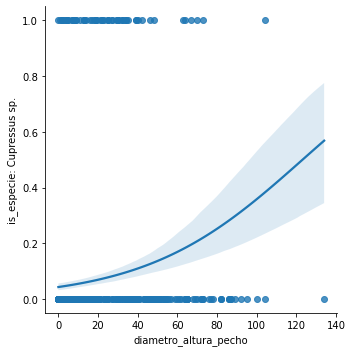

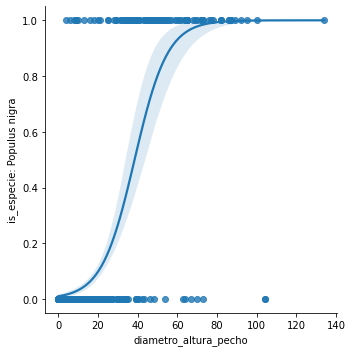

In [8]:
# Veamos ahora como funciona un modelo de regresion logistica 

for especie in data["nombre_cientifico"].unique():
    nombre = "is_especie: " + especie
    data[nombre] = data["nombre_cientifico"] == especie
    sns.lmplot(data = data, x="diametro_altura_pecho", y = nombre, logistic=True)

<AxesSubplot:xlabel='long', ylabel='lat'>

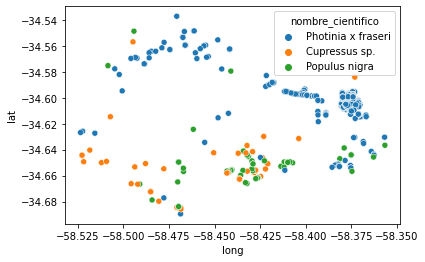

In [10]:
# Vamos a ver como funciona un clustering

# Primero vamos a ver los puntos a priori

import seaborn as sns

sns.scatterplot(data = data, y = "lat", x = "long", hue="nombre_cientifico")

In [12]:
data.isna().sum()
data = data.dropna()

<AxesSubplot:xlabel='long', ylabel='lat'>

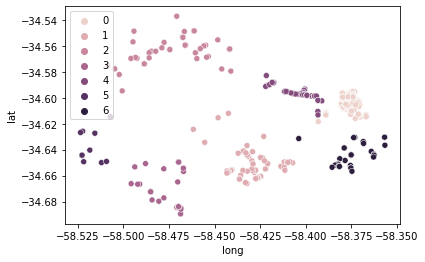

In [16]:
# Probamos como da un Kmeans con diferentes cantidades de clusters
from sklearn.cluster import KMeans


kmeans = KMeans(n_clusters=7,n_init=10) # Numero de repeticiones=10  #,random_state=0 # Con n=6 a veces hace una cosa a veces otra
kmeans.fit(data[["long","lat"]])
labels = kmeans.labels_ 

sns.scatterplot(data = data, x = "long", y = "lat", hue=labels)

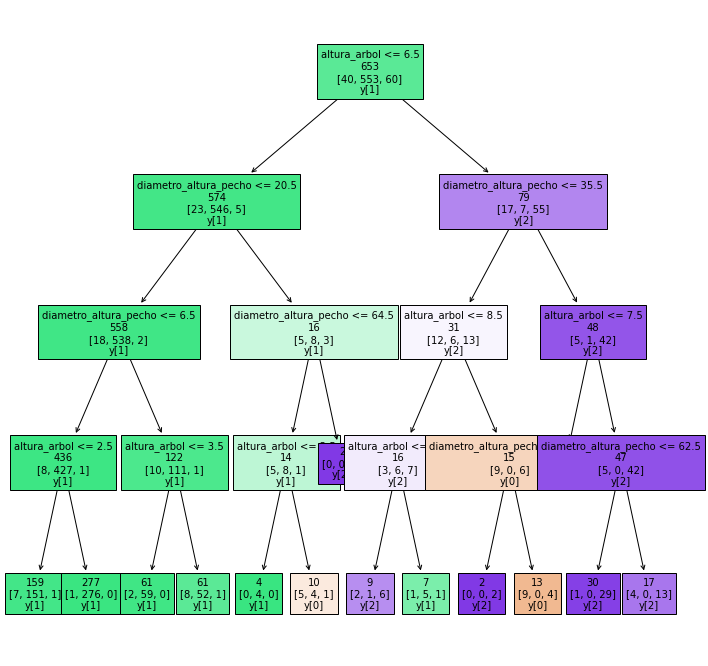

In [18]:
from sklearn import tree
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt


Xtrain, Xtest, ytrain, ytest = train_test_split(data[["altura_arbol","diametro_altura_pecho"]], data["nombre_cientifico"])

tree_inst = tree.DecisionTreeClassifier(max_depth=4)

tree_inst.fit(Xtrain, ytrain)

tree_inst.tree_.node_count

#plot_tree(tree, feature_names=Xtrain.columns, filled=True, class_names=True, label=None, impurity=False) 

plt.figure(figsize=(12,12))  # set plot size (denoted in inches)
tree.plot_tree(tree_inst, fontsize=10, feature_names=Xtrain.columns, filled=True, class_names=True, label=None, impurity=False)
plt.show()